# Aufgabe 12

### Zuerst: Umgebung konfigurieren:

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D

Nun laden wir den Datensatz und gucken uns an, wie er aufgebaut ist:

In [2]:
raw_data = pd.read_csv("edlich-kmeans-A0.csv")
print(raw_data.head())
print("Der Datensatz enthält", len(raw_data), "Zeilen und", len(raw_data.columns), "Spalten.")
print("Die Spaltenüberschriften lauten", list(raw_data))

         V1        V2        V3
0 -5.340236  4.747246  3.823326
1 -9.587065 -3.434466  9.701839
2 -8.385012 -3.902794  8.514620
3  5.708226  2.658575  5.404482
4 -7.431665 -4.390251  9.003216
Der Datensatz enthält 100 Zeilen und 3 Spalten.
Die Spaltenüberschriften lauten ['V1', 'V2', 'V3']


Wir weisen jeder Spalte eine Variable zu:

In [3]:
v1 = raw_data.V1.values
v2 = raw_data.V2.values
v3 = raw_data.V3.values

Und plotten den Datensaz:

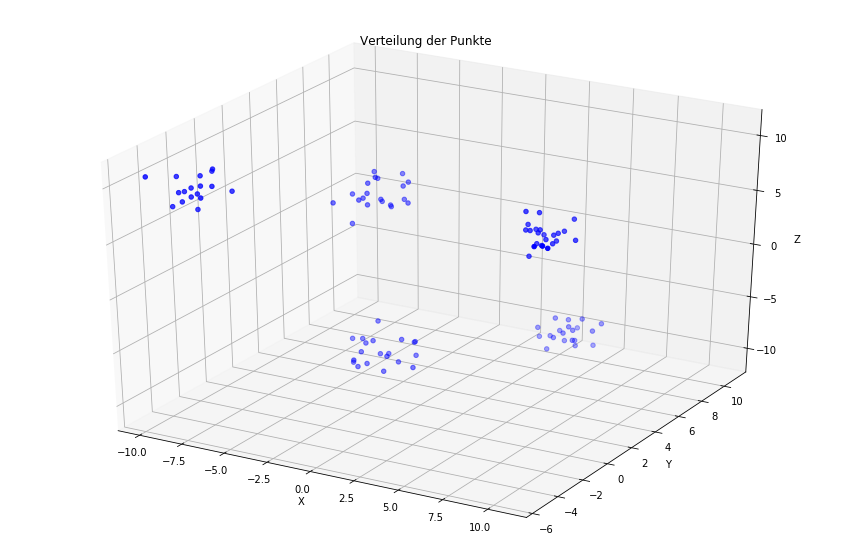

In [4]:
%matplotlib inline
%matplotlib inline
fig = plot.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Verteilung der Punkte")
ax.scatter(v1, v2, v3, color="b", marker="o")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.grid(color="k", linestyle="-", linewidth=2)
plot.show()

Sieht nach 5 Clustern aus. Wir verwenden die Elbow-Methode, um die bestmögliche Anzahl von Clustern zu ermitteln. Dazu generieren wir 25 means und lassen uns die "within-cluster sum-of-squares" ausgeben: Je näher diese bei 0 liegt, um so besser.

In [5]:
sos = []
k_range = range(1, 26)
differences = []
b = 0
X = raw_data.values

for k in k_range:
    clusters = KMeans(n_clusters=k).fit(X)
    clusters.fit(X)
    a = sum(
            np.min(cdist(X, clusters.cluster_centers_, "euclidean"), axis=1)
        ) / X.shape[0]
    sos.append(a)
    b = a - b
    differences.append(abs(b))
    b = a
    
summary = pd.DataFrame(
    {
        "Anzal der Cluster": k_range,
        "Summe der Quadrate": sos,
        "Differenz": differences
    }
)
summary.style.hide_index()

Anzal der Cluster,Summe der Quadrate,Differenz
1,9.703835,9.703835
2,6.609047,3.094789
3,4.559829,2.049217
4,2.985670,1.574159
5,1.674812,1.310858
6,1.347731,0.327081
7,1.268785,0.078946
8,1.206746,0.062039
9,1.147371,0.059375
10,1.113752,0.033620


Grafische Darstellung des Elbow-Effektes:

Text(0, 0.5, 'Summe der Quadrate')

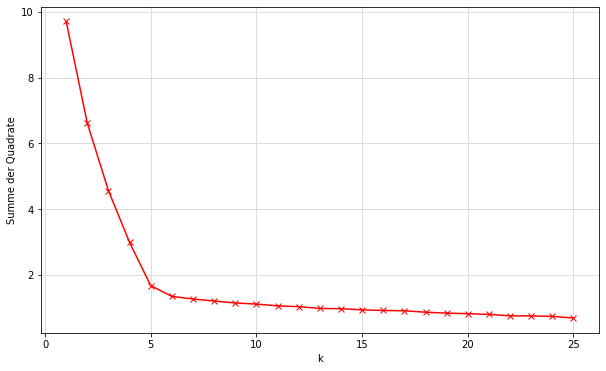

In [6]:
%matplotlib inline
%matplotlib inline
fig = plot.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.grid(color="gainsboro", linestyle="-", linewidth=1)
ax.plot(k_range, sos, "rx-")
ax.set_xlabel("k")
ax.set_ylabel("Summe der Quadrate")

## Die optimale Anzahl von Clustern liegt bei 5 oder 6. Da wir weiter oben schon gesehen haben, dass 5 eine gute Wahl ist, bleiben wir dabei.

Nun bestimmen wir die 5 means:

In [7]:
k = 5
clusters = KMeans(n_clusters=k).fit(X)
means = clusters.cluster_centers_
print(means)

[[-8.53242046 -3.55401526  8.96857685]
 [ 3.66536804  8.91074968 -9.06579829]
 [ 6.47155208  2.70446035  5.19967608]
 [-5.10691526  5.60179825  3.71956936]
 [-2.40331671  2.14752865 -8.02378894]]


Wir wollen nun alle 100 Datenpunkte einem der 5 means zuweisen. Dazu mappen wir jeden Datenpunkt auf einen Cluster:

In [8]:
map = pd.DataFrame()
map["Datensatz Nr."] = raw_data.index.values
map["cluster"] = clusters.labels_

def get_datapoints(cluster_label: int, data: np.ndarray) -> np.ndarray:
    index_list = map[map.cluster == cluster_label]["Datensatz Nr."]
    return data[index_list.values]

for i in range(0, k):
    print("Cluster %d:\n" % (i+1), get_datapoints(i, X), "\n\n")

map.style.hide_index()

Cluster 1:
 [[-9.58706542 -3.43446551  9.70183939]
 [-8.38501223 -3.90279369  8.51462008]
 [-7.43166517 -4.39025105  9.00321635]
 [-8.35525163 -3.51695636  7.16271385]
 [-8.84016412 -3.81234109  8.80786358]
 [-7.95099381 -3.75513267  9.51565272]
 [-7.36754369 -3.66265759  9.59661436]
 [-9.33855585 -4.07697147  7.49077986]
 [-8.3473716  -2.39322402 10.06514846]
 [-9.11525282 -1.52176357  9.12851326]
 [-8.77099893 -2.76603266  9.58008012]
 [-7.24433689 -2.42665469  8.42902234]
 [-9.79229975 -5.29213902 10.76203353]
 [-8.90454249 -4.13474999  8.89824818]
 [-8.72157703 -3.48424759  8.95646275]
 [-8.67293425 -4.1865386   8.17502236]
 [-8.22558206 -3.66133986  8.67797519]] 


Cluster 2:
 [[  5.028509     9.04769521  -8.54843651]
 [  3.70343606   8.61137549  -9.59257599]
 [  4.00128095   9.65877107  -8.12242599]
 [  2.4369706    9.23242365  -9.95541369]
 [  5.13307774   9.65324317  -8.22755652]
 [  4.47860799   9.96006984 -10.75615132]
 [  4.13618317   8.31145323  -7.90357204]
 [  3.4540394  

Datensatz Nr.,cluster
0,3
1,0
2,0
3,2
4,0
5,1
6,2
7,0
8,4
9,2


Abschließend gucken wir uns den Plot an:

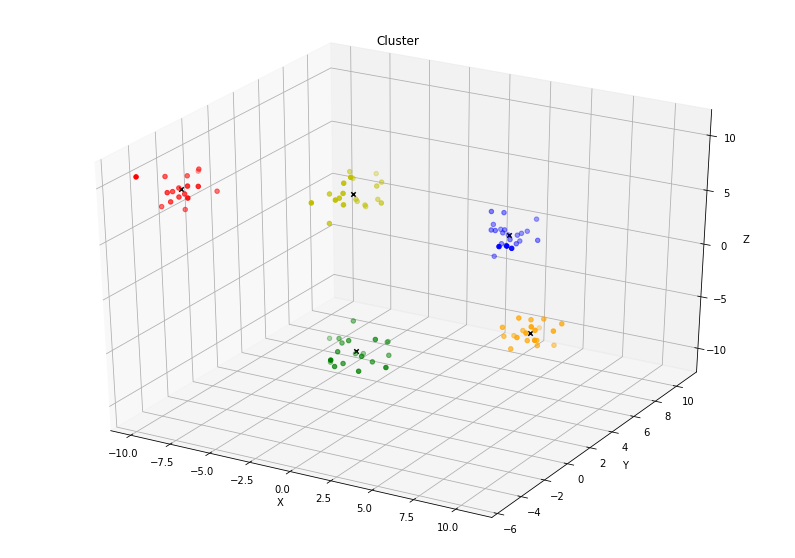

In [9]:
%matplotlib inline
%matplotlib inline
cluster_colors = [
    "red", 
    "orange", 
    "blue", 
    "y", 
    "green"
] 

fig = plot.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Cluster")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
#ax.azim = 135

for i in range(0, k):
    p = means[i]
    datapoints = get_datapoints(i, X)
    ax.scatter(
        p[0], 
        p[1],
        p[2],
        c = "black", marker="x"
    )
    ax.scatter(
        datapoints[:, 0], 
        datapoints[:, 1],
        datapoints[:, 2],
        color=cluster_colors[i], marker="o"
    )

Für einen besseren Überblick geben wir das ganze als interaktive 3D-Grafik aus:

<IPython.core.display.Javascript object>


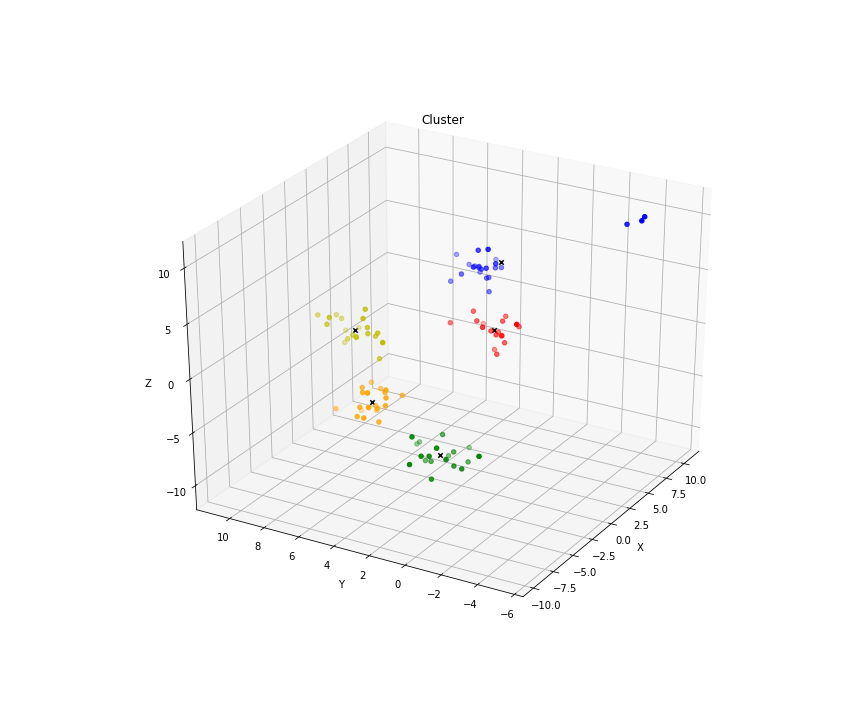

In [13]:
%matplotlib notebook
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

cluster_colors = [
    "red", 
    "orange", 
    "blue", 
    "y", 
    "green"
] 

fig = plot.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Cluster")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
#ax.azim = 135

for i in range(0, k):
    p = means[i]
    datapoints = get_datapoints(i, X)
    ax.scatter(
        p[0], 
        p[1],
        p[2],
        c = "black", marker="x"
    )
    ax.scatter(
        datapoints[:, 0], 
        datapoints[:, 1],
        datapoints[:, 2],
        color=cluster_colors[i], marker="o"
    )
# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

So können wir erkennen, dass wir 3 Datenpunkte haben, für die sich je nach Anforderung vielleicht das Anlegen eines 6. Clusters lohnt.